# day 209,day 211,day 215

# CNN:

# what is CNN:
* CNN stands for stands for Convolutional Neural Network.
* CNN is a machine learning algorithm optimized for dealing with Image classification.

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import requests
import time
from tqdm.auto import tqdm

In [ ]:
torch.__version__

'2.1.0+cu118'

In [ ]:
torchvision.__version__

'0.16.0+cu118'

# getting the dataset

In [ ]:
# getting training data and testing data

train_data = torchvision.datasets.FashionMNIST(
    root='data', # the directory name
    train=True, # whether train_data or test_data
    transform=torchvision.transforms.ToTensor(), #convert the data to tensors
    download=True, #whether you want to download
    target_transform=None, #whether you want to change the type of the labels(y_train,y_test) or keep them as originals

)

test_data = torchvision.datasets.FashionMNIST(
    root='data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12728232.35it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200026.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3761324.47it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17786060.13it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# exploration,analysis and freethrows

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
# accessing an image from the train_data and knowing its shape and class name

image,label = train_data[0]

image.shape, class_names[label]


# conclusion:
'''in pytorch we use the color channel before the height and width (1,28,28) -> (color,height,weight) wheras in
 tensorflow the shape of an image is (28,28,1) -> (height,width,color). Be mindful of this factor! '''

'in pytorch we use the color channel before the height and width (1,28,28) -> (color,height,weight) wheras in\n tensorflow the shape of an image is (28,28,1) -> (height,width,color). Be mindful of this factor! '

TypeError: ignored

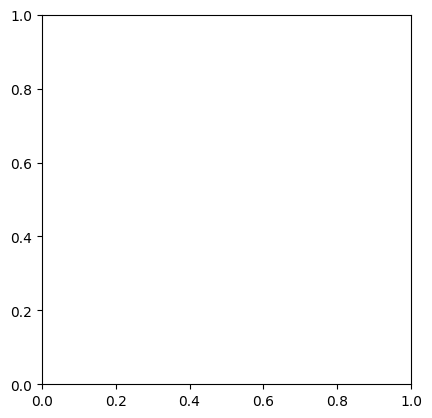

In [ ]:
# visulizing the image

plt.imshow(image)
plt.title(class_names[label])
plt.axis('off')
plt.show()

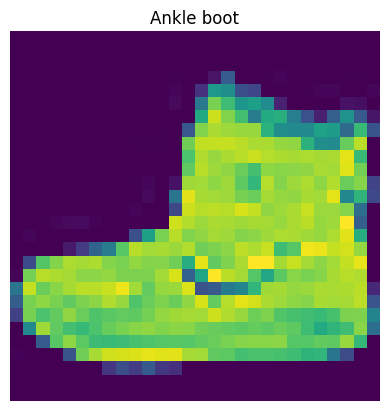

In [ ]:
# the extra color dimension in the image needs to be squeezed in order to visualize it.

plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis('off')
plt.show()

# create a matrix of 16 random images 4 on the rows and 4 on the cols from the train_data

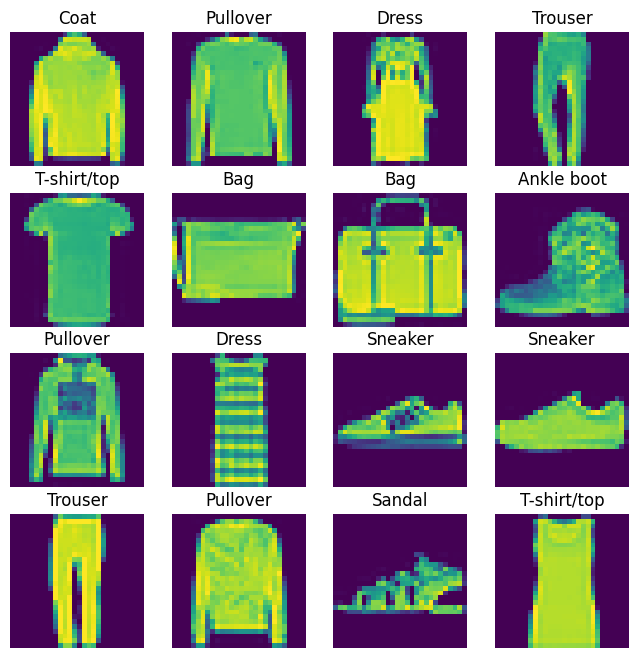

In [ ]:
plt.figure(figsize=(8,8))
rows = 4
cols = 4

for i in range(1,rows*cols+1):
  # getting random indices from the train_data
  index = torch.randint(0,len(train_data),size=[1]).item()

  # plotting the image
  plt.subplot(rows,cols,i)
  image,label_index = train_data[index]
  plt.imshow(image.squeeze())
  plt.title(class_names[label_index])
  plt.axis('off')

# note that the plt.show() is out of index
plt.show()




# prepare dataloader

 * right now our train_data and test_data are datasets, now in order to make these datasets iterable we need to use data loader.
 -------------
 * in `pytorch` we use from torch.utils.data import data_loader.
 ---------
 * this is analogous to tf.keras.utils.image_dataset_from_direcory() or from tf.keras.preprocessing.image import ImageDataGenerator in `tensorflow`.

 # why we use mini batches:
 * the RAM can't process all thousands and millions of images at once that's why we need to batches of images, usually the number of images in a batch would be 32 but it can be increased in multiples of 8(byte-order), to reduce the load on RAM.

In [ ]:
# DataLoader is used for batching the data
train_data = DataLoader(train_data,
                        batch_size=32,
                        shuffle=True) # shuffle shuffles the images in the batches every time


test_data = DataLoader(test_data,
                       batch_size=32,
                       shuffle=False) # we set it here for False just for kink.

# exploration,analysis and freethrows

In [ ]:
len(train_data),len(test_data)

(1875, 313)

# iterating over the images in train_data

In [ ]:
for batch in train_data:
  print(batch)
  break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0706, 0.6784, 0.3922,  ..., 0.5373, 0.4157, 0.0000],
          [0.0000, 0.0471, 0.0706,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

In [ ]:
# iter() iterates over each of 1875 batches in the train_data and next() function returns the next object from
# the iterator


next(iter(train_data))

# note: it only contains one batch of 32 images of 1875 batches of 60000 images.

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
# exploring flatten layer

flatten_layer = torch.nn.Flatten()

images32,labels32 = next(iter(train_data))

# we randomly take an image from 32 images.
one_image = images32[5]
#
print('Shape of one image before flattening: {} '.format(one_image.shape))
print('Shape of one image after flattening: {}'.format(flatten_layer(one_image).shape))


# the flatten layer just converted the image matrix into one single array (28 X 28 = 784)

Shape of one image before flattening: torch.Size([1, 28, 28]) 
Shape of one image after flattening: torch.Size([1, 784])




```
# This is formatted as code
```

# building model0:

* model0 has the followings
1. it has only linear layers.
2. it first flattens the image.
3. then passes them over to the linear layers to predict the outcome.


In [ ]:
# subclassing
class VisionModel0(torch.nn.Module):
  def __init__(self,i,o,h): # i for input, o for output, h for hidden
    super().__init__()

    self.layer_stack = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=i,out_features=h),
        torch.nn.Linear(in_features=h,out_features=o),
    )

  def forward(self,x):
    return self.layer_stack(x)


# device agnostice code:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model definition
image_shape = 28*28
num_classes = len(class_names)
hidden_layers = 5
model0 = VisionModel0(i=image_shape,o=num_classes,h=hidden_layers)
model0 = model0.to(device)

# exploration,analysis and freethrows

In [ ]:
# passing a variable with random values to see how the model performs
x = torch.rand((1,1,28,28))
model0(x)

tensor([[ 0.4309, -0.2124, -0.1267,  0.0699,  0.2216,  0.4594,  0.3614,  0.1900,
         -0.3908, -0.0307]], grad_fn=<AddmmBackward0>)

In [ ]:
x = torch.randint(1,9,(1,1,28,28),dtype=torch.float32) # setting the dtype is important here!
model0(x)

tensor([[ 3.6286,  2.1026, -1.3381,  1.6755, -1.4775, -0.5970,  2.8693,  0.3794,
          0.9273,  2.0799]], grad_fn=<AddmmBackward0>)

# compiling the model

In [ ]:
# downloading the helper functions:

if Path('helper_functions.py').is_file():
  print('Already Exists')
else:
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py').content
  with open('helper_functions.py','wb') as f:
    f.write(request)

In [ ]:
from helper_functions import accuracy_fn

# but we don't want to use this accuracy_fn, we want to create our own

In [ ]:
# compiling the model

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(),
                            lr=0.01)
def accuracy(prediction,actual):
  correct = torch.eq(prediction,actual).sum().item()
  acc = correct/len(actual)

  return acc


# experiment to see how fast our model runs:

In [ ]:
import time

start = time.perf_counter()
end = time.perf_counter()

end-start

4.4439999996370716e-05

In [ ]:
def print_time(start:float,end:float,device:torch.device=None):
  total_time = end - start
  print('Total Training Time is: {:.3f}'.format(total_time))


print_time(time.perf_counter(),time.perf_counter(),device)

Total Training Time is: 0.000


# writing training and testing loop for our batched data

In [ ]:
# tqdm shows progress bar
from tqdm.auto import tqdm

epochs = 3

# begin the time
start = time.perf_counter()

# setting the train_loss to zero to calculate the accumulated training loss
  accumulated_train_loss = 0
  accumulated_train_accuracy = 0
  accumulated_test_loss = 0
  accumulated_test_accuracy = 0

# please remember to put tqdm before range in the for loop for tqdm to work.
for epoch in tqdm(range(epochs)):

  # batch shows which we are in
  # train_data will have both features and labels hence (x_train,y_train)
  for batch, (x_train,y_train) in enumerate(train_data):

    # train the model
    model0.train()

    # train loss and train accuracy
    train_logits = model0(x_train)
    train_prediction = torch.argmax(train_logits,dim=1)
    train_actual = y_train
    train_loss = loss(train_logits,train_actual)
    train_accuracy = accuracy(train_prediction,train_actual)
    accumulated_train_loss += train_loss
    accumulated_train_accuracy += train_accuracy

    # training the loss
    accumulated_train_loss.backward()

    # zero grading the optimizer
    optimizer.zero_grad()

    # stepping the optimizer up a notch
    optimizer.step()


  # averaging the accumulated_test_loss and accumulated_test_accuracy batch wise
  # len(train_data) refers to all the batches
  accumulated_train_loss = accumulated_train_loss/len(train_data)
  accumulated_train_accuracy /= len(train_data)


  # testing
  model0.eval()


  with torch.inference_mode():

    for batch,(x_test,y_test) in enumerate(test_data):

      # test loss and test accuracy
      test_logits = model0(x_test)
      test_prediction = torch.argmax(test_logits,dim=1)
      test_actual = y_test
      test_loss = loss(test_logits,test_actual)
      test_accuracy = accuracy(test_prediction,test_actual)
      accumulated_test_loss += test_loss
      accumulated_test_accuracy += test_accuracy


    # average accumulated loss and accuracy
    accumulated_test_accuracy /= len(test_data)
    accumulated_test_loss /= len(test_data)

    # print out the results
  print('Epoch:{}| Train_loss: {:.3f}, Test_loss: {:.3f} | Train_accuracy: {:.3f}, Test_accuracy: {:3f}'\
          .format(epoch,accumulated_train_loss,accumulated_test_loss,\
                  accumulated_train_accuracy,accumulated_test_accuracy))

  print('--------------------')




# calculate the time
end = time.perf_counter()
print_time(start,end,device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0| Train_loss: 2.342, Test_loss: 2.342 | Train_accuracy: 0.090, Test_accuracy: 0.088359
--------------------
Epoch:1| Train_loss: 2.342, Test_loss: 2.342 | Train_accuracy: 0.090, Test_accuracy: 0.088359
--------------------
Epoch:2| Train_loss: 2.342, Test_loss: 2.342 | Train_accuracy: 0.090, Test_accuracy: 0.088359
--------------------
Total Training Time is: 29.635


# exploration,analysis and freethrows

In [ ]:
train_data.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_data.dataset) # number of total images in it.

60000

In [ ]:
len(train_data) # number of batches

1875

In [ ]:
# accessing an image
train_data.dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
model0.__class__.__name__

'VisionModel0'

In [ ]:
# evaluating the model (practice)

model0.eval()

accum_loss,accum_acc = 0,0

with torch.inference_mode():
  for batch,(x_test,y_test) in enumerate(test_data):
    test_logits = model0(x_test)
    test_predictions = test_logits.argmax(dim=1)
    test_actual = y_test
    test_loss = loss(test_logits,test_predictions)
    test_accuracy = accuracy(test_predictions,test_actual)
    accum_loss += test_loss
    accum_acc += test_accuracy




print('model_name: {},accum_loss: {}, accum_acc: {}'\
      .format(model0.__class__.__name__,accum_loss/len(test_data),accum_acc/len(test_data)))

model_name: VisionModel0,accum_loss: 1.8726574182510376, accum_acc: 0.09844249201277955


# do everything above without seeing and add non-linear function such as relu this time


# day 217,day 221

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import torch
import torchvision
from torch.utils.data import DataLoader
import time
from tqdm.auto import tqdm
import torchmetrics

In [ ]:
# downloading training and testing data of FashionMNIST
train_data = torchvision.datasets.FashionMNIST(root='data',
                                               train=True,
                                               download=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform = None)

test_data = torchvision.datasets.FashionMNIST(root='data',
                                              train=False,
                                              download=True,
                                              transform=torchvision.transforms.ToTensor(),
                                              target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 13763041.10it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 228449.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4260292.70it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10272253.56it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

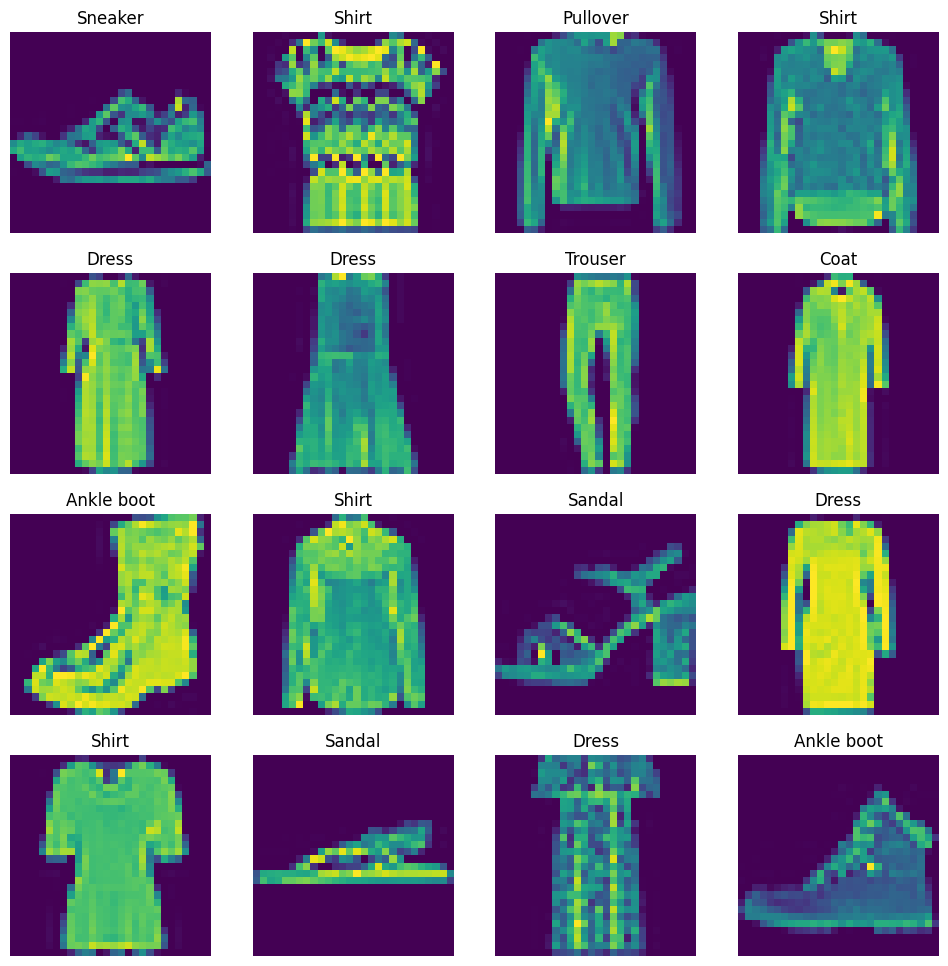

In [ ]:
# visualizing the train data
class_names = train_data.classes
plt.figure(figsize=(12,12))

rows = 4
cols = 4
for i in range(1,rows*cols+1):
  plt.subplot(rows,cols,i)
  random_index = torch.randint(0,len(train_data),size=[1])[0]
  image,label = train_data[random_index]
  plt.imshow(image.squeeze())
  plt.title(class_names[label])
  plt.axis('off')
plt.show()

In [ ]:
# dataloader is used for batching the data.

train_DataLoader = DataLoader(train_data,
                        batch_size=32,
                        shuffle=True)

test_DataLoader = DataLoader(test_data,
                       batch_size=32,
                       shuffle=False)

In [ ]:
# counter for couting the code execution time in seconds

def print_time(start,end):
  total = end-start

  print('Total time it took is: %s'%(total))

In [ ]:
# subclassing
class VisionModel1(torch.nn.Module):
  def __init__(self,i,o,h):
    super().__init__()

    self.layer_stack = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=i,out_features=h),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=h,out_features=o)
    )

  def forward(self,x):
    return self.layer_stack(x)


device = 'cuda' if torch.cuda.is_available() else 'cpu'

model1 = VisionModel1(i=28*28,o=len(class_names),h=10)

model1.to(device)

# compiling the model
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters(),
                             lr=0.01)
accuracy = torchmetrics.Accuracy(task='multiclass',num_classes=len(class_names))

In [ ]:
# fitting the model
epochs = 5

start = time.perf_counter()

for epoch in tqdm(range(epochs)):

  # we have to train and test  batch by batch

  # we are setting these parameters as zero because on every epoch it starts anew.
  accumulated_train_loss, accumulated_test_loss,accumulated_train_accuracy,accumulated_test_accuracy = 0,0,0,0
  for batch,(x_train,y_train) in enumerate(train_DataLoader):

    # train the model
    model1.train()

    # getting train_loss and test_loss
    train_logits = model1(x_train)
    train_predictions = torch.argmax(train_logits,dim=1)
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_accuracy = accuracy(train_predictions,train_actuals)
    accumulated_train_loss += train_loss
    accumulated_train_accuracy += train_accuracy

    # optimizer zero grading
    optimizer.zero_grad()

    # loss backward
    train_loss.backward()

    # stepping the optimizer up a notch
    optimizer.step()


  accumulated_train_loss /= len(train_DataLoader)
  accumulated_train_accuracy /= len(train_DataLoader)

  # evaluating the model
  model1.eval()
  with torch.inference_mode():
    for batch,(x_test,y_test) in enumerate(test_DataLoader):
      # test_loss and test_accuracy
      test_logits = model1(x_test)
      test_predictions = torch.argmax(test_logits,dim=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_accuracy = accuracy(test_predictions,test_actuals)
      accumulated_test_loss += test_loss
      accumulated_test_accuracy += test_accuracy

    accumulated_test_loss /= len(test_DataLoader)
    accumulated_test_accuracy /= len(test_DataLoader)


    print('Epoch: {} | Train Loss: {:.4f}, Train Accuracy: {:4f} | Test Loss: {:.4f} , Test Accuracy: {:.4f}'\
        .format(epoch,accumulated_train_loss,accumulated_train_accuracy,accumulated_test_loss,\
                accumulated_test_accuracy))

end = time.perf_counter()
print_time(start,end)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.6853, Train Accuracy: 0.751617 | Test Loss: 0.6277 , Test Accuracy: 0.7771
Epoch: 1 | Train Loss: 0.5678, Train Accuracy: 0.800767 | Test Loss: 0.5753 , Test Accuracy: 0.8020
Epoch: 2 | Train Loss: 0.5592, Train Accuracy: 0.806383 | Test Loss: 0.5652 , Test Accuracy: 0.8029
Epoch: 3 | Train Loss: 0.5479, Train Accuracy: 0.809383 | Test Loss: 0.5989 , Test Accuracy: 0.7876
Epoch: 4 | Train Loss: 0.5458, Train Accuracy: 0.809450 | Test Loss: 0.5794 , Test Accuracy: 0.7980
Total time it took is: 74.99397662500087


# exploration,analysis and freethrows

In [ ]:
len(train_DataLoader) # has these many batches

1875

# practice

In [ ]:
# subclassing the model
class VisionModel2(torch.nn.Module):
  def __init__(self,i,o,h):
    super().__init__()

    self.layer_stack = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=i,out_features=h),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=h,out_features=h),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=h,out_features=h),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=h,out_features=h),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=h,out_features=o),
        torch.nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

# creating the model2
model2 = VisionModel2(i=28*28,o=len(class_names),h=10).to(device)

# compile the model2
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model2.parameters(),
                             lr=0.01)
accuracy = torchmetrics.Accuracy(task='multiclass',num_classes=len(class_names))

# fitting the model
epochs = 3

start = time.perf_counter()

for epoch in range(epochs):

  # setting the accumulated loss and accuracies
  acc_train_loss,acc_test_loss,acc_train_accuracy,acc_test_accuracy=0,0,0,0

  # training and testing the data batch by batch
  for batch,(x_train,y_train) in enumerate(train_DataLoader):

    # training the model
    model2.train()

    # train_loss and train_accuracy
    train_logits = model2(x_train)
    train_predictions = torch.argmax(train_logits,dim=1)
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_accuracy = accuracy(train_predictions,train_actuals)
    acc_train_loss += train_loss
    acc_train_accuracy += train_accuracy

    # back propogating the train loss
    train_loss.backward()

    # setting the optimizer's gradient to zero on every loop
    optimizer.zero_grad()

    # stepping the optimizer up a notch.
    optimizer.step()

  # outside the loop find the probability function for acc_loss and acc_accuracy batch wise
  acc_train_loss /= len(train_DataLoader)
  acc_train_accuracy /=len(test_DataLoader)


  # testing
  model2.eval()

  with torch.inference_mode():
    for batch,(x_test,y_test) in enumerate(test_DataLoader):

      # test loss and test accuracy
      test_logits = model2(x_test)
      test_predictions = torch.argmax(test_logits,dim=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_accuracy = accuracy(test_predictions,test_actuals)
      acc_test_loss += test_loss
      acc_test_accuracy += test_accuracy

    # outside the loop find probability function for acc_test_loss and acc_test_accuracy
    acc_test_loss /= len(test_DataLoader)
    acc_test_accuracy /= len(test_DataLoader)



    # printing while inside the inference mode
    print('Epoch: {} | Train Loss: {:.4f}, Train Accuracy: {:4f} | Test Loss: {:.4f} , Test Accuracy: {:.4f}'\
        .format(epoch,accumulated_train_loss,accumulated_train_accuracy,accumulated_test_loss,\
                accumulated_test_accuracy))

end = time.perf_counter()
print_time(start,end)

Epoch: 0 | Train Loss: 0.5458, Train Accuracy: 0.809450 | Test Loss: 0.5794 , Test Accuracy: 0.7980
Epoch: 1 | Train Loss: 0.5458, Train Accuracy: 0.809450 | Test Loss: 0.5794 , Test Accuracy: 0.7980
Epoch: 2 | Train Loss: 0.5458, Train Accuracy: 0.809450 | Test Loss: 0.5794 , Test Accuracy: 0.7980
Total time it took is: 43.84465324000121


# conclusion: linear and non-linear layers alone can't help to increase the accuracy of the model any further so, we need a better performer the Convolutional Neural Network(CNN)

# day 221,day 223,day 225,day 228

# First CNN

In [1]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import zipfile
import os
import requests
from pathlib import Path
from torch.utils.data import DataLoader
import time
from tqdm.auto import tqdm
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [3]:
# helper functions

if Path('helper_functions.py').is_file():
  print('Already Downloaded')
else:
  print('Downloading the helper functions')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py').content
  with open('helper_functions.py','wb') as f:
    f.write(request)



In [5]:
# getting the train and test data
train_data = torchvision.datasets.FashionMNIST(root='data',
                                                train=True,
                                                transform=torchvision.transforms.ToTensor(),
                                                download=True,
                                                target_transform=None)

test_data = torchvision.datasets.FashionMNIST(root='data',
                                              train=False,
                                              transform=torchvision.transforms.ToTensor(),
                                              download=True,
                                              target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 17924204.79it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266996.11it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4907791.92it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8093057.34it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
# batchifying the data

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True) # setting the seed would get the model be trained and tested on same dataset
                                            # shuffling changes it all.

test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=False)

In [7]:
# print total time taken for code to run
def print_time(start,end):
  total = end-start
  return total

# building the model

**the thing to be mindful of is the i = color channels of the image(in our case it's going to be 1)**

In [8]:
# building our first convolutional neural network model
class VisionModelCNN1(torch.nn.Module):
  def __init__(self,i,o,h):
    super().__init__()

    self.conv_block1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=i,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=(2,2)))


    self.conv_block2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),

        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=(2,2)))


    self.classifier_block = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=h*7*7,out_features=o)
    )

  def forward(self,x):
    # we do this method because we want to print the shapes

    # pass inputs to conv_block1 and store it in x
    x = self.conv_block1(x)
    # print('shape of the conv1 is:{}'.format(x.shape))

    # pass the above result to conv_block2 and store it in x
    x = self.conv_block2(x)
    # print('shape of the conv2 is:{}'.format(x.shape))

    # pass the above result to classifier_block and store it in x
    x = self.classifier_block(x)
    # print('shape of the classifier is:{}'.format(x.shape))

    return x

# i = color channels of the image, o = number of labels of the image, h = hidden layers.
class_names = train_data.classes
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model1 = VisionModelCNN1(i=1,o=len(class_names),h=10).to(device) # i=1 is color_channels of the image


In [9]:
# compiling the model1
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)
def accuracy(predictions,actuals):
  correct = torch.eq(predictions,actuals).sum().item()
  acc = correct/len(actuals)
  return acc


In [10]:
# fitting the model1

# setting manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3
start = time.perf_counter()

for epoch in tqdm(range(epochs)):

  a_train_loss,a_train_acc,a_test_loss,a_test_acc = 0,0,0,0

  # train the model
  model1.train()

  # training the model batch by batch
  for batch, (x_train,y_train) in enumerate(train_dataloader):

    # moving the x_train and y_train to the apt device
    x_train,y_train = x_train.to(device),y_train.to(device)

    # train_loss and train_accuracy
    train_logits = model1(x_train) # it gives out a matrix of size 1x10
    train_predictions = train_logits.argmax(dim=1) # find the maximum in first dimension
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_accuracy = accuracy(train_predictions,train_actuals)
    a_train_loss += train_loss
    a_train_acc  += train_accuracy

    # set the optimizer to zero grad at every iteration
    optimizer.zero_grad()

    # backpropogate only the trian_loss not accumulated train loss
    train_loss.backward()

    # step the optimizer up a notch
    optimizer.step()

  # normalize the a_train_loss and a_train_acc
  a_train_loss /= len(train_dataloader)
  a_train_acc /= len(train_dataloader)

  # testing the model
  model1.eval()

  # put the inference mode on top of the epochs
  with torch.inference_mode():
    for batch, (x_test,y_test) in enumerate(test_dataloader):

      # moving the x_test and y_test to the apt device
      x_test,y_test = x_test.to(device),y_test.to(device)

      # getting test_loss and test_accuracy
      test_logits = model1(x_test)
      test_predictions = test_logits.argmax(dim=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_accuracy = accuracy(test_predictions,test_actuals)
      a_test_loss += test_loss
      a_test_acc  += test_accuracy

    # normalizing the a_test_acc and a_test_loss
    a_test_loss /= len(test_dataloader)
    a_test_acc /= len(test_dataloader)

    # printing the results
    print('Epoch:{} | Train Loss: {:.4f} , Train Accuracy: {:.4f} | Test Loss: {:.4f}, Test Accuracy: {:.4f}'\
          .format(epoch,a_train_loss,a_train_acc,a_test_loss,a_test_acc))


end = time.perf_counter()
print_time(start,end)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0 | Train Loss: 0.6237 , Train Accuracy: 0.7735 | Test Loss: 0.3988, Test Accuracy: 0.8635
Epoch:1 | Train Loss: 0.3650 , Train Accuracy: 0.8684 | Test Loss: 0.3619, Test Accuracy: 0.8692
Epoch:2 | Train Loss: 0.3312 , Train Accuracy: 0.8802 | Test Loss: 0.3315, Test Accuracy: 0.8799


106.3116143069999

# conclusion:

# explanation for getting poor results with low accuracy despite following the instructor:
setting the random seed helped in achieving consistent results, leading to a well-performing model. Without the seed, the randomness might have resulted in poor weight initialization, inconsistent data shuffling, and unstable optimization, leading to a poorly performing model. Setting a random seed ensures stability and reproducibility, making it an essential practice in the field of machine learning and deep learning.

# takeaway:
* when the weights are randomly initialized, it is better to have `deterministic randomness` such as those we get from setting the random seed(torch.manual_seed(42)), this keeps our model be initialized with random but determined weights, trained with random but determined datasets, tested with random but determined datasets which escalates our chance of seeing a accurate model.
* but when weights of our model are the weights of the other model which are trained in similar datasets(transfer learing), then setting the random seed might not be much useful atleast not as much as when everything was random.

# making predictions with random test samples

# pseudo code:
1. take the test_data
2. randomly select some images.
3. make predictions with those images.
4. see if the prediction label matches the actual label.

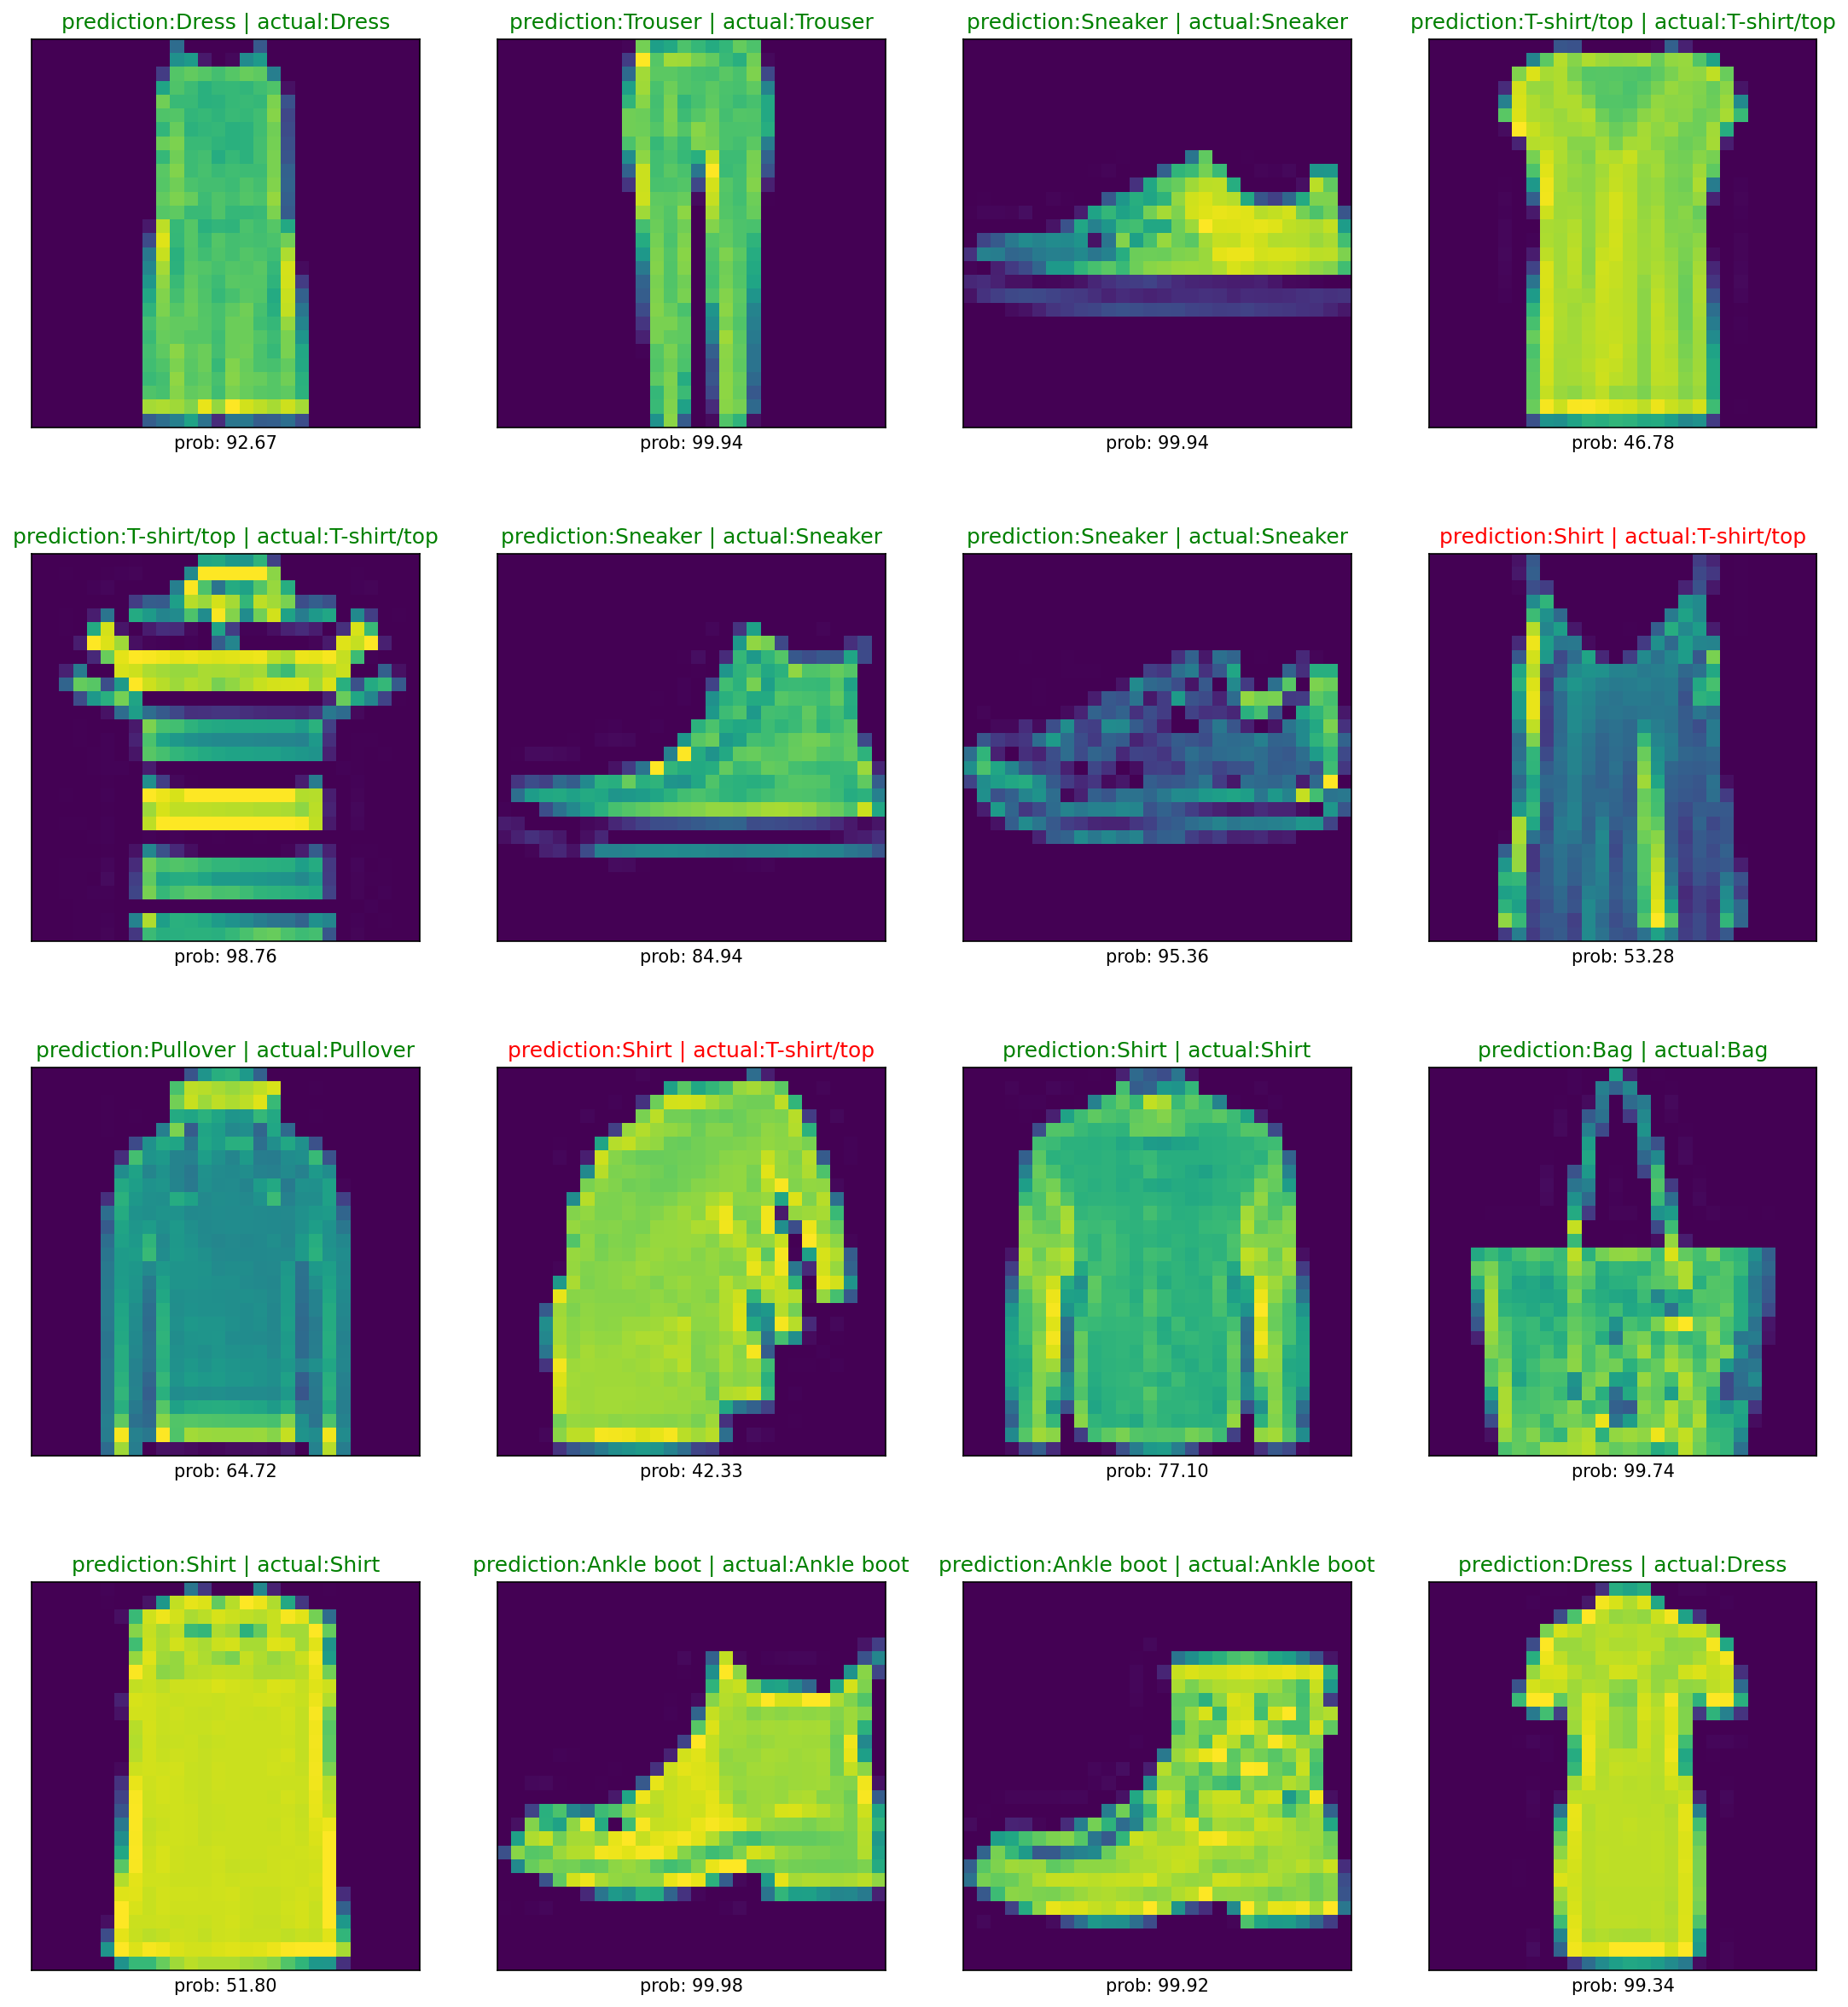

In [11]:
# make predictions with random images

# number of images to see
n_images = 16

# figsize
plt.figure(figsize=(18,20),dpi=150)
model1.eval()
with torch.inference_mode():
  for i in range(n_images):
    random_index = np.random.randint(0,len(test_data),1)
    image,actual_label = test_data[int(random_index)]

    # before passing the image to the model give it the batch dimension
    image = image.unsqueeze(dim=0).to(device)
    logit = model1(image)
    pred = logit.argmax(dim=1)
    probability = torch.max(torch.softmax(logit,dim=1))*100
    pred_class = class_names[pred]
    actual_class = class_names[actual_label]

    # showing the images
    plt.subplot(4,4,i+1)
    plt.imshow(image.squeeze().cpu())


    if pred_class == actual_class:
      title_color = 'g'
    else:
      title_color = 'r'

    plt.title('prediction:{} | actual:{}'.format(pred_class,actual_class,),color=title_color)
    plt.xlabel('prob: {:.2f}'.format(probability))
    plt.xticks([])
    plt.yticks([])


  plt.show()

# exploration,analysis and freethrows:

In [ ]:
logit,pred

(tensor([[ 1.8677, -0.6955,  5.6828, -0.9220,  6.8428, -6.3540,  5.4005, -7.6989,
          -1.0319, -4.1475]], device='cuda:0'),
 tensor([4], device='cuda:0'))

In [ ]:
torch.softmax(logit,dim=1)

tensor([[4.4337e-03, 3.4165e-04, 2.0120e-01, 2.7239e-04, 6.4179e-01, 1.1916e-06,
         1.5171e-01, 3.1047e-07, 2.4403e-04, 1.0823e-05]], device='cuda:0')

In [ ]:
torch.softmax(logit,dim=1).argmax(dim=1) # which is as same as pred

tensor([4], device='cuda:0')

In [ ]:
torch.max(torch.softmax(logit,dim=1))

tensor(0.6418, device='cuda:0')

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
image,label = test_data[0]

image.shape

torch.Size([1, 28, 28])

In [ ]:
torchvision.transforms.Resize(())(image).shape

torch.Size([1, 28, 28])

In [ ]:
len(test_data)

10000

In [ ]:
random_index = np.random.randint(0,len(test_data),size=[1])

image,label = test_data[int(random_index)]
image.shape

torch.Size([1, 28, 28])

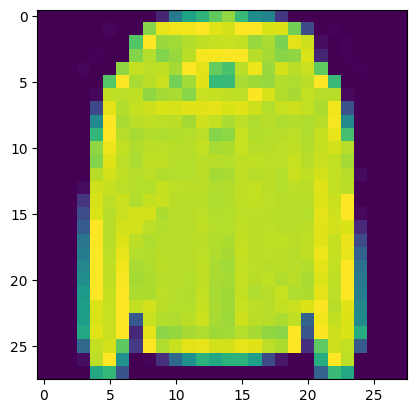

In [ ]:
plt.imshow(image.squeeze())

In [ ]:
len(train_dataloader)

1875

In [ ]:
model1(test_data[0][0].unsqueeze(dim=0)).shape

shape of the conv1 is:torch.Size([1, 10, 14, 14])
shape of the conv2 is:torch.Size([1, 10, 7, 7])
shape of the classifier is:torch.Size([1, 10])


torch.Size([1, 10])

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data[0][0].shape

# 1 is the color channel of these images because they are black and white.

torch.Size([1, 28, 28])

In [ ]:
# just for testing how the shape of the image changes after being through the conv layer

img = torch.randint(0,255,size=(32,3,64,64))

convoluted_layer = torch.nn.Conv2d(in_channels=3,
                                   out_channels=10,
                                   kernel_size=(3,3),
                                   stride=(1,1),
                                   padding=1) # padding preserves the shape of input data.

# normalizing the image while we supply it inside the convoluted_layer
convoluted_image = convoluted_layer((img/255))


# testing how the shape of the image changes after being through the maxpool2d layer
maxpool2d_layer = torch.nn.MaxPool2d(kernel_size=(2,2))

# print the shapes of the original image and convoluted image
print('shape of original image: {}'.format(img.shape))
print('shape of convoluted image: {}'.format(convoluted_image.shape))
print('shape of the convoluted image in maxpool2d: {}'.format(maxpool2d_layer(convoluted_layer(img/255)).shape))

shape of original image: torch.Size([32, 3, 64, 64])
shape of convoluted image: torch.Size([32, 10, 64, 64])
shape of the convoluted image in maxpool2d: torch.Size([32, 10, 32, 32])


In [ ]:
image.unsqueeze(0).shape

torch.Size([1, 32, 3, 64, 64])

In [ ]:
64/4

16.0

In [ ]:
test_data[0][0].shape

torch.Size([1, 28, 28])

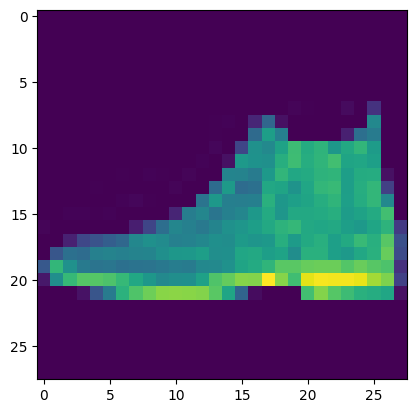

In [ ]:
plt.imshow(test_data[0][0].squeeze(dim=0))
plt.show()

In [ ]:
model1(test_data[0][0])

RuntimeError: ignored

In [ ]:
# how flatten layer works with the dimension of the image.
x = torch.randint(1,99,(23,32,1,28,28))
flatten_layer = torch.nn.Flatten()
flatten_layer(x).shape

torch.Size([23, 25088])

In [ ]:
32*1*28*28

25088

28.0 28.0


# making confusion matrix:

1. make predictions with our test data using our model
2. make a confusion matrix using `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`.

In [12]:
# make predictions with our test data using our model

predictions = []
actuals = []

model1.eval()
with torch.inference_mode():
  for x_test,y_test in tqdm(test_dataloader):

    # getting x_test and y_test to apt device
    x_test,y_test = x_test.to(device),y_test.to(device)

    logit = model1(x_test)
    test_prediction = logit.argmax(dim=1)

    # put prediction on cpu for evaluation
    predictions.append(test_prediction.cpu())
    actuals.append(y_test.cpu())


# concatenate the multidimensional predictions tensor into a single vector tensor containing prediction labels for
# 10000 test images all at once
predictions = torch.cat(predictions)
actuals = torch.cat(actuals)

  0%|          | 0/313 [00:00<?, ?it/s]

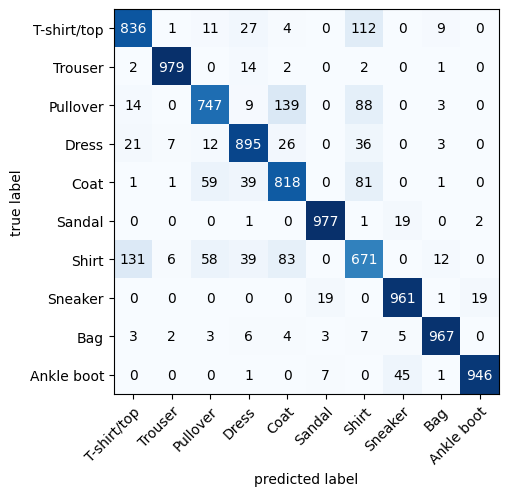

In [13]:
import torchmetrics
from mlxtend.plotting import plot_confusion_matrix

# making ConfusionMatrix
cm = torchmetrics.ConfusionMatrix(task='multiclass',num_classes=len(class_names))
cm = cm(predictions,actuals)


# plotting the confusion matrix using mlxtend
fig,ax = plot_confusion_matrix(
    cm.numpy(),
    class_names=class_names,
    figsize=(12,5))

# exploration,analysis and freethrows

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
actuals

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
torch.sum(actuals == test_data.targets)

tensor(10000)

In [ ]:
predictions[:10]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5,
         1, 6, 6, 0, 9, 3, 8, 8]),
 tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
         8, 4, 8, 0, 7, 7, 8, 5]),
 tensor([1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
         0, 6, 5, 3, 6, 7, 1, 8]),
 tensor([0, 1, 6, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
         0, 0, 9, 9, 3, 0, 8, 4]),
 tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
         1, 4, 5, 0, 4, 7, 9, 3]),
 tensor([5, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 0,
         7, 9, 9, 4, 4, 7, 1, 2]),
 tensor([1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
         1, 6, 7, 2, 8, 5, 3, 0]),
 tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 6,
         6, 2, 9, 7, 6, 5, 5, 4]),
 tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 

In [ ]:
torch.cat(predictions) # we have concatenated the multi-dimensional predictions into a single vector.

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
len(torch.cat(predictions))

10000

In [ ]:
torch.nn.Flatten(predictions)

Flatten(
  start_dim=[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5,
          1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
          8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
          0, 6, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 6, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
          0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
          1, 4, 5, 0, 4, 7, 9, 3]), tensor([5, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 0,
          7, 9, 9, 4, 4, 7, 1, 2]), tensor([1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
          1, 6, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 6,
          6, 2, 9, 7, 6, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 

In [ ]:
assert int(mlxtend.__version__.split('.')[1]) >= 19 , "mlxtend.__version__ should be greater than 19"

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

# save and load the model

In [14]:
# save the model
model_path = Path('saved_models')

# making the path repeated running resistant.
model_path.mkdir(parents=True,exist_ok=True)

# creating the model name with .pth extension
model_name = 'CNN_model1.pth'

# model_save_path = model_path/model_name
model_save_path = model_path/model_name

# saving the model's state dict to saved_models directory.
torch.save(obj=model1.state_dict(),
           f=model_save_path)



# instantiating the loaded_model with the model class with the same random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model1 = VisionModelCNN1(i=1,o=len(class_names),h=10).to(device)

# update this new model with the weights of our saved model
loaded_model1.load_state_dict(torch.load(model_save_path))



<All keys matched successfully>

In [17]:
# testing our loaded model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model1.eval()

with torch.inference_mode():
  a_test_loss, a_test_accuracy = 0,0

  for x_test,y_test in tqdm(test_dataloader):

    # test logits, test prediction, test actuals
    test_logits = loaded_model1(x_test)
    test_predictions = test_logits.argmax(dim=1)
    test_actuals = y_test
    test_loss = loss(test_logits,test_actuals)
    test_accuracy = accuracy(test_predictions,test_actuals)
    a_test_loss += test_loss
    a_test_accuracy += test_accuracy

  # normalising
  a_test_loss /= len(test_dataloader)
  a_test_accuracy /= len(test_dataloader)

  # print
  print('Test Loss:{:.2f} | Test Accuracy:{:.2f} '.format(a_test_loss,a_test_accuracy))

  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss:0.33 | Test Accuracy:0.88 


In [18]:
# testing our original model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model1.eval()

with torch.inference_mode():
  a_test_loss, a_test_accuracy = 0,0

  for x_test,y_test in tqdm(test_dataloader):

    # test logits, test prediction, test actuals
    test_logits = model1(x_test)
    test_predictions = test_logits.argmax(dim=1)
    test_actuals = y_test
    test_loss = loss(test_logits,test_actuals)
    test_accuracy = accuracy(test_predictions,test_actuals)
    a_test_loss += test_loss
    a_test_accuracy += test_accuracy

  # normalising
  a_test_loss /= len(test_dataloader)
  a_test_accuracy /= len(test_dataloader)

  # print
  print('Test Loss:{:.2f} | Test Accuracy:{:.2f} '.format(a_test_loss,a_test_accuracy))

  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss:0.33 | Test Accuracy:0.88 


# conclusion: They are same so, we can move on now!